In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart_2022_with_nans.csv')
print(len(data))

445132


In [3]:
tmp = data.dropna()
print(len(data))

445132


In [4]:
print(len(data[data['HadHeartAttack'] == 'Yes']))
print(len(tmp[tmp['HadHeartAttack'] == 'Yes']))
print()
print(len(data[data['HadHeartAttack'] == 'No']))
print(len(tmp[tmp['HadHeartAttack'] == 'No']))

25108
13435

416959
232587


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='HadHeartAttack', ylabel='count'>

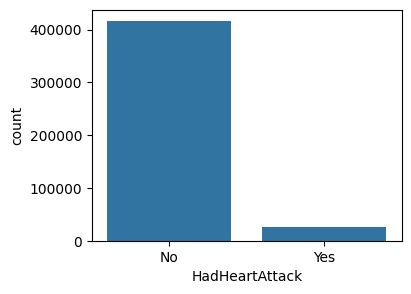

In [6]:
plt.figure(figsize = (4, 3))
sns.countplot(x = 'HadHeartAttack', data = data)

In [7]:
data['HeartDisease'] = 0
data.loc[data['HadHeartAttack'] == 'Yes', 'HeartDisease'] = 1
data.loc[data['HadAngina'] == 'Yes', 'HeartDisease'] = 1

<Axes: xlabel='HeartDisease', ylabel='count'>

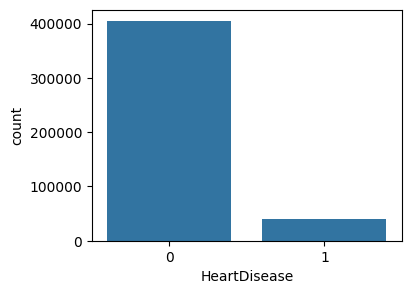

In [9]:
plt.figure(figsize = (4, 3))
sns.countplot(x = 'HeartDisease', data = data)

## Random Over Sampler

In [11]:
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'